In [10]:
#Load mnist dataset

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255


In [11]:
#confirm label shape
print("train_labels shape:", train_labels.shape)
print("train_labels example:", train_labels[:10])


train_labels shape: (60000,)
train_labels example: [5 0 4 1 9 2 1 3 1 4]


In [12]:
#Model definition

from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8724 - loss: 0.4444
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9655 - loss: 0.1154
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9794 - loss: 0.0716
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9851 - loss: 0.0508
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9891 - loss: 0.0361


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9769 - loss: 0.0772
Test accuracy: 0.9807000160217285


In [15]:
predictions = network.predict(test_images)

import numpy as np
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_labels[0])



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted label: 7
True label: 7


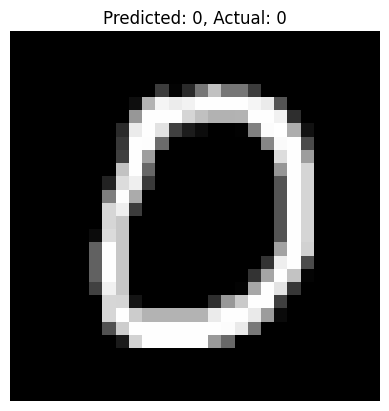

In [18]:
import matplotlib.pyplot as plt

plt.imshow(test_images[10].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[10])}, Actual: {test_labels[10]}")
plt.axis('off')
plt.show()
